In [50]:
import pandas as pd  
import numpy as np
import matplotlib
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
from datetime import date
from datetime import datetime

### Original Data

In [2]:
df_original = pd.read_json ('full_format_recipes.json')

In [3]:
df_original.head()

,calories,categories,date,desc,directions,fat,ingredients,protein,rating,sodium,title
0,426.0,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",2006-09-01 04:00:00,None,"[1. Place the stock, lentils, celery, carrot, ...",7.0,"[4 cups low-sodium vegetable or chicken stock,...",30.0,2.500,559.0,"Lentil, Apple, and Turkey Wrap"
1,403.0,"[Food Processor, Onion, Pork, Bake, Bastille D...",2004-08-20 04:00:00,This uses the same ingredients found in boudin...,[Combine first 9 ingredients in heavy medium s...,23.0,"[1 1/2 cups whipping cream, 2 medium onions, c...",18.0,4.375,1439.0,Boudin Blanc Terrine with Red Onion Confit
2,165.0,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",2004-08-20 04:00:00,None,[In a large heavy saucepan cook diced fennel a...,7.0,"[1 fennel bulb (sometimes called anise), stalk...",6.0,3.750,165.0,Potato and Fennel Soup Hodge
3,NaN,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",2009-03-27 04:00:00,The Sicilian-style tomato sauce has tons of Me...,[Heat oil in heavy large skillet over medium-h...,NaN,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN,5.000,NaN,Mahi-Mahi in Tomato Olive Sauce
4,547.0,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",2004-08-20 04:00:00,None,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,"[1 12-ounce package frozen spinach soufflé, th...",20.0,3.125,452.0,Spinach Noodle Casserole


In [4]:
df_original.describe()

,calories,fat,protein,rating,sodium
count,1.597600e+04,1.590800e+04,15929.000000,20100.000000,1.597400e+04
mean,6.307857e+03,3.460975e+02,99.946199,3.713060,6.211474e+03
std,3.585851e+05,2.043102e+04,3835.616663,1.343144,3.328903e+05
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,1.980000e+02,7.000000e+00,3.000000,3.750000,8.000000e+01
50%,3.310000e+02,1.700000e+01,8.000000,4.375000,2.940000e+02
75%,5.860000e+02,3.300000e+01,27.000000,4.375000,7.110000e+02
max,3.011122e+07,1.722763e+06,236489.000000,5.000000,2.767511e+07


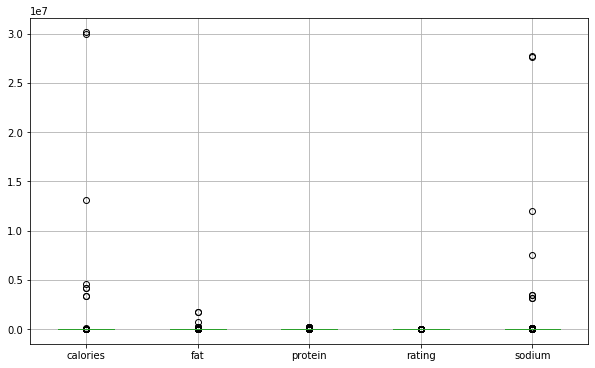

In [5]:
df_original.boxplot(figsize=(10, 6))

In [6]:
df_original.to_csv('epicurious_data_original.csv', index=False)

### Updated Epicurious Data

In [91]:
df = pd.read_json ('full_format_recipes.json')

In [92]:
#inspecting the data for date formats
df.dtypes

calories              float64
categories             object
date           datetime64[ns]
desc                   object
directions             object
fat                   float64
ingredients            object
protein               float64
rating                float64
sodium                float64
title                  object
dtype: object

In [93]:
df.shape[0]

20130

In [94]:
# drop NaN values
df = df.dropna()
df.shape[0] # number of rows and columns

10608

In [95]:
# change the categories header to tags
df.rename(columns = {'categories': 'tags'}, inplace=True)

In [96]:
# add a column for count of ingredients
df['ingredients_count'] = df['ingredients'].apply(lambda x: len(x))

In [97]:
# add a column for count of tags
df['tags_count'] = df['tags'].apply(lambda x: len(x))

In [98]:
# remove recipes before 2004
start_date = '01/01/2004'
end_date = '12/31/2016'

start_date = datetime.strptime(start_date,"%m/%d/%Y")
end_date = datetime.strptime(end_date,"%m/%d/%Y")

mask = (df['date'] > start_date) & (df['date'] <= end_date)
df = df.loc[mask]
df.shape[0]

10599

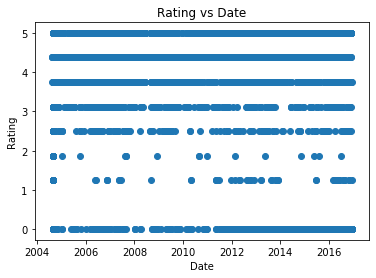

In [99]:
x_rating = df['date']
y_feature = df['rating']

plt.scatter(x_rating, y_feature)
plt.title("Rating vs Date")
plt.xlabel("Date")
plt.ylabel("Rating")
plt.show()

In [100]:
# add a column for length of time (in years) on site until 12/31/2016
df['age'] = end_date - df['date']
df['age'] = df['age'].dt.days.astype('int16')/365


In [101]:
# remove zero rating and zero nutritional info recipes
df = df.query("calories > 0 & fat > 0 & protein > 0 & sodium > 0 & rating > 0")
df.describe()

,calories,fat,protein,rating,sodium,ingredients_count,tags_count,age
count,9.119000e+03,9.119000e+03,9119.000000,9119.000000,9.119000e+03,9119.000000,9119.000000,9119.000000
mean,8.563650e+03,4.637477e+02,140.318127,4.114897,8.379403e+03,10.796579,12.602369,10.046004
std,4.517624e+05,2.567724e+04,4910.864842,0.647147,4.191690e+05,4.680862,4.887865,3.490562
min,1.300000e+01,1.000000e+00,1.000000,1.250000,1.000000e+00,1.000000,0.000000,0.046575
25%,2.330000e+02,1.100000e+01,5.000000,3.750000,1.360000e+02,7.000000,9.000000,8.580822
50%,3.920000e+02,2.100000e+01,11.000000,4.375000,3.660000e+02,10.000000,12.000000,12.369863
75%,6.490000e+02,3.800000e+01,33.000000,4.375000,8.130000e+02,13.000000,16.000000,12.369863
max,3.011122e+07,1.722763e+06,236489.000000,5.000000,2.767511e+07,51.000000,33.000000,12.397260


In [102]:
# refactor rating scale 0 to 4

# function to get normalized rating/define and bins
def get_normalized_rating(rating):
    if rating == 0:
        return 0
    elif rating == 1.250:
        return 1
    elif rating == 1.875:
        return 1.5
    elif rating == 2.500:
        return 2
    elif rating == 3.125:
        return 2.5    
    elif rating == 3.750:
        return 3.0
    elif rating == 4.375:
        return 3.5    
    else:
        return 4
    
# create a normalized rating column
df['rating_normalized'] = df['rating'].apply(get_normalized_rating)

In [103]:
# remove outliers based on visual inspection of features
# calories: remove anything above 10,000
# fat: remove anything above 2,000
# protein: remove anything above 2,000
# sodium: remove anything above 10,000

df = df.query("calories < 10000 & fat < 2000 & protein < 2000 & sodium < 10000")
df.describe()

,calories,fat,protein,rating,sodium,ingredients_count,tags_count,age,rating_normalized
count,9049.000000,9049.000000,9049.000000,9049.000000,9049.000000,9049.000000,9049.000000,9049.000000,9049.000000
mean,531.129186,31.455962,24.015029,4.113231,623.802188,10.782959,12.607912,10.048893,3.290585
std,576.095958,42.460473,37.704635,0.647081,838.414120,4.674646,4.892330,3.489629,0.517665
min,13.000000,1.000000,1.000000,1.250000,1.000000,1.000000,0.000000,0.046575,1.000000
25%,232.000000,11.000000,5.000000,3.750000,135.000000,7.000000,9.000000,8.580822,3.000000
50%,389.000000,20.000000,11.000000,4.375000,363.000000,10.000000,12.000000,12.369863,3.500000
75%,644.000000,37.000000,32.000000,4.375000,798.000000,13.000000,16.000000,12.369863,3.500000
max,8858.000000,776.000000,1114.000000,5.000000,9792.000000,51.000000,33.000000,12.397260,4.000000


(0, 1000)

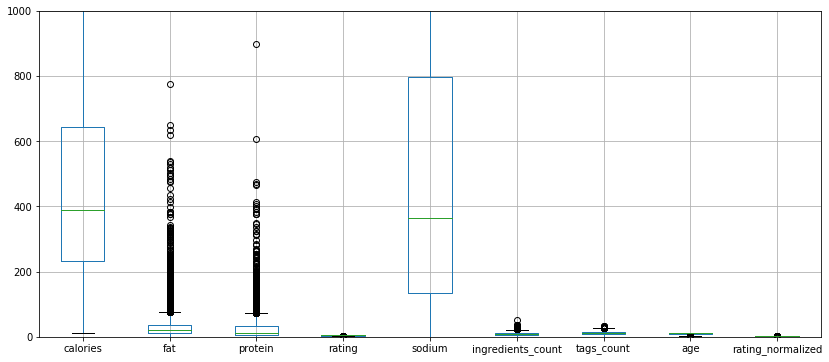

In [104]:
df.boxplot(figsize=(14, 6))
plt.ylim(0, 1000)

(0, 40)

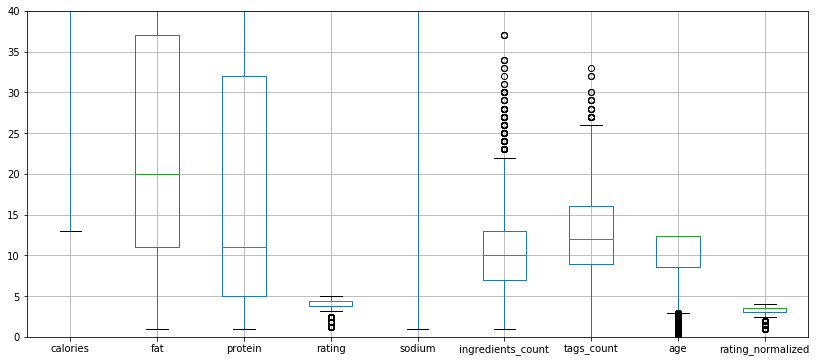

In [105]:
df.boxplot(figsize=(14, 6))
plt.ylim(0, 40)

In [106]:
# count the number of unique rating values
rating_counts = df['rating_normalized'].value_counts()

# count the total number of ratings
rc_total = df['rating_normalized'].count()

# 
rating_counts = rating_counts.rename_axis('rating_normalized').reset_index(name='counts')

# unique rating value / total number of ratings * 100 = unique rating percentage
rating_counts['percentage'] = ((rating_counts['counts']/rc_total)*100).map('{:,.1f}%'.format)
rating_counts

,rating_normalized,counts,percentage
0,3.5,4165,46.0%
1,3.0,2473,27.3%
2,4.0,1347,14.9%
3,2.5,716,7.9%
4,2.0,237,2.6%
5,1.0,77,0.9%
6,1.5,34,0.4%


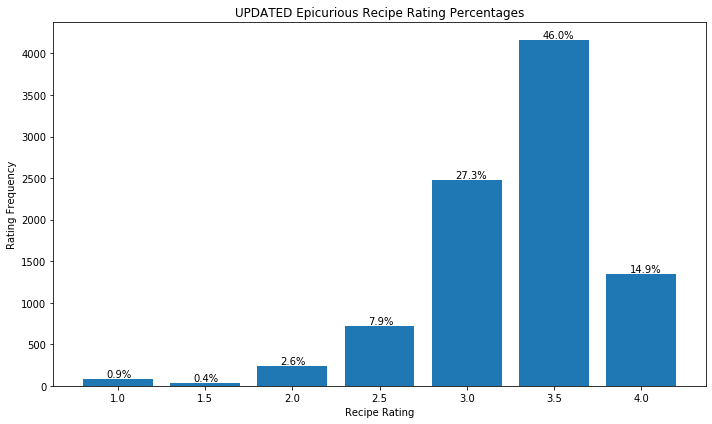

In [107]:
x_rating = rating_counts['rating_normalized']
y_feature = rating_counts['counts']

plt.figure(figsize=(10, 6)) 
labels = rating_counts['rating_normalized']
barplot = plt.bar(x_rating, y_feature, width = 0.4, label = labels)

bar_var = 0

for bar in barplot:

    label_height = bar.get_height()
    label_value = rating_counts['percentage'][bar_var]

    plt.text(bar.get_x() + bar.get_width()/3, label_height, label_value, va='bottom')
    
    bar_var += 1 
        

plt.title("UPDATED Epicurious Recipe Rating Percentages")
plt.xticks(x_rating, labels)
plt.xlabel("Recipe Rating")
plt.ylabel("Rating Frequency")
plt.tight_layout()

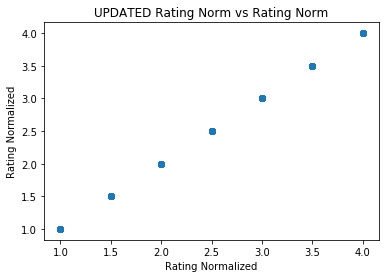

In [108]:
# CLEANED - Rating vs Rating
x_rating = df['rating_normalized']
y_feature = df['rating_normalized']

plt.scatter(x_rating, y_feature)
plt.title("UPDATED Rating Norm vs Rating Norm")
plt.xlabel("Rating Normalized")
plt.ylabel("Rating Normalized")
plt.show()

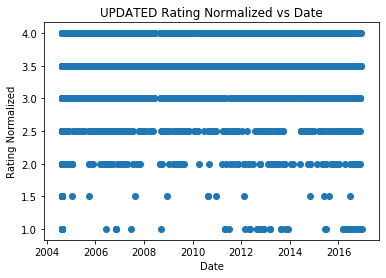

In [109]:
x_rating = df['date']
y_feature = df['rating_normalized']

plt.scatter(x_rating, y_feature)
plt.title("UPDATED Rating Normalized vs Date")
plt.xlabel("Date")
plt.ylabel("Rating Normalized")
plt.show()

In [110]:
df.to_csv('epicurious_data_cleaned_updated.csv', index=False)

### Imputed NAs Epicurious Data

In [82]:
df = pd.read_json ('full_format_recipes.json')

In [83]:
# change the categories header to tags
df.rename(columns = {'categories': 'tags'}, inplace=True)

# change the categories header to tags
df.rename(columns = {'categories': 'tags'}, inplace=True)

# remove recipes before 2004
start_date = '01/01/2004'
end_date = '12/31/2016'

start_date = datetime.strptime(start_date,"%m/%d/%Y")
end_date = datetime.strptime(end_date,"%m/%d/%Y")

mask = (df['date'] > start_date) & (df['date'] <= end_date)
df = df.loc[mask]

# add a column for length of time (in years) on site until 12/31/2016
df['age'] = end_date - df['date']
df['age'] = df['age'].dt.days.astype('int16')/365

# remove zero rating and zero nutritional info recipes
df = df.query("calories > 0 & fat > 0 & protein > 0 & sodium > 0 & rating > 0")

# refactor rating scale 0 to 4

# function to get normalized rating/define and bins
def get_normalized_rating(rating):
    if rating == 0:
        return 0
    elif rating == 1.250:
        return 1
    elif rating == 1.875:
        return 1.5
    elif rating == 2.500:
        return 2
    elif rating == 3.125:
        return 2.5    
    elif rating == 3.750:
        return 3.0
    elif rating == 4.375:
        return 3.5    
    else:
        return 4
    
# create a normalized rating column
df['rating_normalized'] = df['rating'].apply(get_normalized_rating)

df = df.query("calories < 10000 & fat < 2000 & protein < 2000 & sodium < 10000")

df.to_csv('epicurious_data_cleaned_updated_nona.csv', index=False)

In [84]:
# imputing (replacing missing with median value)
median = df.describe().iloc[1]
df['rating_normalized'].fillna(median, inplace = True)

In [85]:
# add a column for count of ingredients
df['ingredients_count'] = df['ingredients'].apply(lambda x: len(x))

In [86]:
# add a column for count of ingredients
df['ingredients_count'] = df['ingredients'].apply(lambda x: len(x))

In [87]:
# add a column for count of tags
df['tags_count'] = df['tags'].apply(lambda x: len(x))

In [88]:
df.describe()

,calories,fat,protein,rating,sodium,age,rating_normalized,ingredients_count,tags_count
count,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000
mean,521.662686,30.643875,22.794954,4.090795,594.241547,10.551235,3.272636,10.589311,12.369859
std,592.112179,42.903796,36.446892,0.641253,804.818416,3.171424,0.513003,4.549341,4.865374
min,13.000000,1.000000,1.000000,1.250000,1.000000,0.046575,1.000000,1.000000,0.000000
25%,228.000000,10.000000,4.000000,3.750000,121.000000,9.972603,3.000000,7.000000,8.000000
50%,374.000000,20.000000,10.000000,4.375000,342.000000,12.369863,3.500000,10.000000,12.000000
75%,626.000000,36.000000,30.000000,4.375000,763.000000,12.369863,3.500000,13.000000,16.000000
max,9831.000000,923.000000,1114.000000,5.000000,9792.000000,12.397260,4.000000,51.000000,33.000000


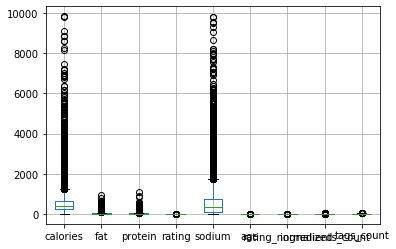

In [89]:
df.boxplot()

In [90]:
df.to_csv('epicurious_data_updated_imputed.csv', index=False)